---

# Q1 (40 Points)

<font size=4>
Author: Sina Elahimanesh
			<br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

# Sampling in Bayesian Network

In this assignment, we will implement diffrent methods of sampling and try to compare the methods by varying queries and number of samples. In the next section you will implement Bayesian Network as a Python class with these methods:

* CPT: returns conditional probability table of nodes
* PMF: returns probability mass function of given query with value enumeration
* Sampling: implementation of different sampling methods
    
We will use following BN in this problem.

<img src="Images/BN.png" width=1300 height=650 />

In [1]:
# import packages
import numpy as np
import pandas as pd
import pickle as pkl
from tqdm import tqdm
import random
from matplotlib import pyplot as plt

In [2]:
from inference import BN

In [3]:
"""
    define graph here based on the diagram of the Bayes Net
"""
# TODO: define graph
graph = {
            'A': [['B', 'C'], []],
            'B': [['D', 'E'], ['A']],
            'E': [['C'], ['B']],
            'C': [['F'], ['A', 'E']],
            'D': [['F'], ['B']],
            'F': [[], ['C', 'D']]
}
print(1e2)

100.0


In [4]:
"""
    define CPT here based on the diagram of the Bayes Net
"""
CPT = {
  'A':
    pd.DataFrame([[1, 0.8], [0, 0.2]], columns=['A', 'pA']) , 
  'B':
      pd.DataFrame([[1, 1, 0.3], [1, 0, 0.9], [0, 1, 0.7], [0, 0, 0.1]] , columns=['B', 'A' , 'pB']) , 
  'C':
      pd.DataFrame([[1, 1 , 1, 0.1], [1, 1 ,0, 0.3], [1, 0, 1 , 0.05], [1, 0, 0 , 0.6 ], [0 ,1 , 1 , 0.9] , [0 , 1 , 0 , 0.7] ,[0, 0 , 1 , 0.95] , [0 , 0 , 0 , 0.4] ] , columns=['C', 'A', 'E' , 'pC']) , 
  'D':
       pd.DataFrame([[1, 1,  0.2], [1, 0, 0.25], [0, 1, 0.8], [0, 0, 0.75]], columns=['D', 'B', 'pD']) , 
  'F':
       pd.DataFrame([[1, 1, 1, 0.05], [1, 1, 0, 0.5], [1, 0, 1, 0.15], [1, 0, 0, 0.7], [0, 1, 1, 0.95],
                                [0, 1, 0, 0.5], [0, 0, 1, 0.85], [0, 0, 0, 0.3]], columns=['F', 'C','D','pF']) ,
  'E':
      pd.DataFrame([[1 , 1 , 0.15], [1 , 0 , 0.3], [0 , 1 , 0.85 ], [0 , 0 , 0.7] ] , columns=['E', 'B' , 'pE'] )
  }


In this part you will compare sampling results with real probabilities for these settings:

* query: $P(F=1|B=1,C=0)$ , $P(F=0,E=1|A=1,D=0)$
* number of samples: 100, 500, 1000, 3000, 10000, 50000

First find the probabilities with inference methods, then find the approximate probabilities for the queries with sampling methods with different number of samples. At the end, you will plot errors of diffrent methods by number of samples.

In [5]:
random.seed(5)
bayes_net = BN(graph, CPT)
num_samples = [100, 500, 1000, 3000]
sampling_methods = ['Prior', 'Rejection', 'Likelihood Weighting', 'Gibbs']
def plot(title, x, y, xlabel, ylabel):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.scatter(x, y)
    for i, j in zip(x, y):
        plt.text(i, j, '({}, {})'.format(i, j))
    plt.show()

    
def comparing_results(query, evidence):
    prob = bayes_net.pmf(query, evidence)
    for method in sampling_methods: 
        error_sampling = [round(bayes_net.sampling(query, evidence, method, num)-prob, 5) for num in num_samples]
        plot(method, num_samples, error_sampling, 'number of samples', 'errors')

0.5900000000000001


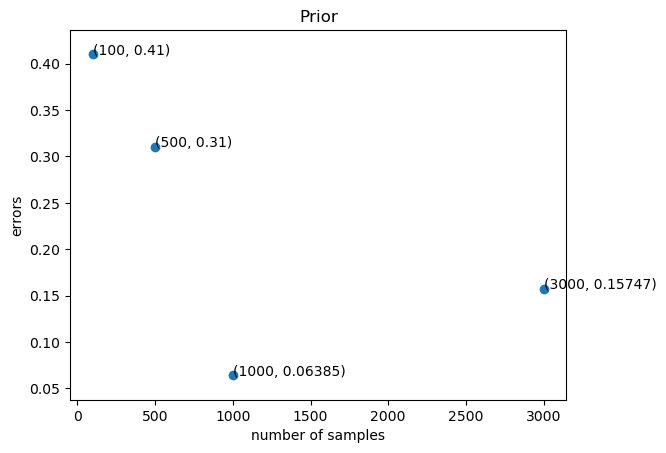

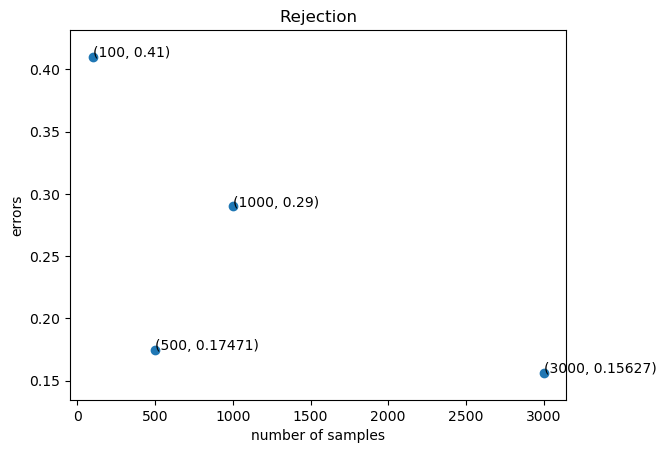

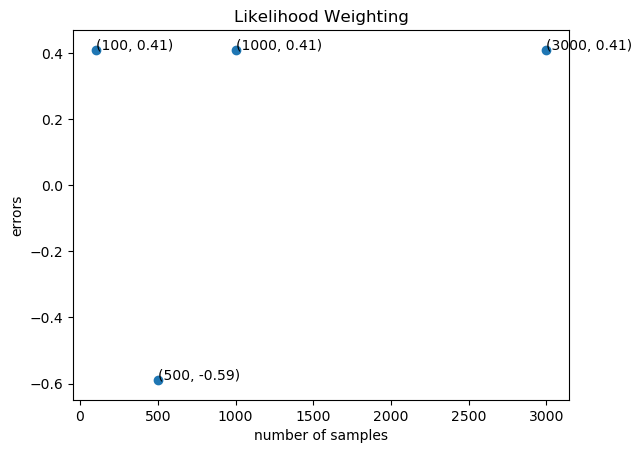

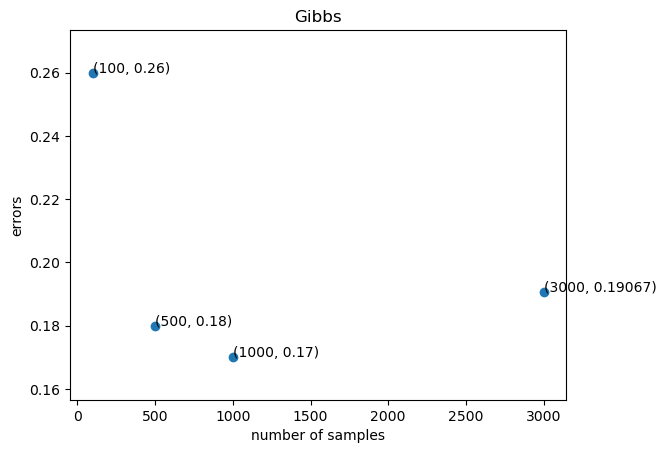

In [6]:
random.seed(5)
query = {'F': 1}
evidence = {'B': 1, 'C': 0}
print(bayes_net.pmf(query , evidence))
comparing_results(query, evidence)

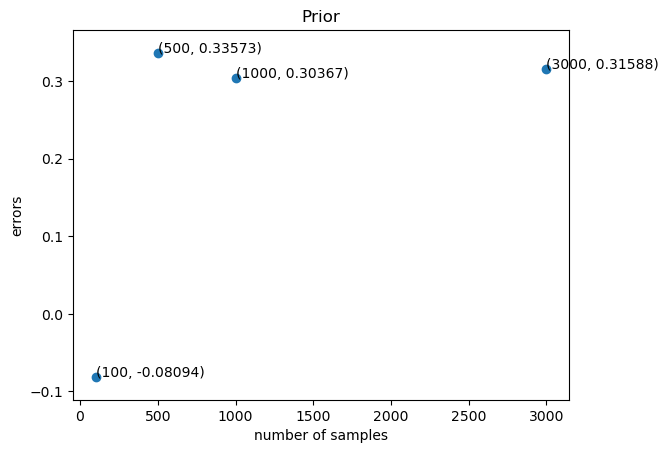

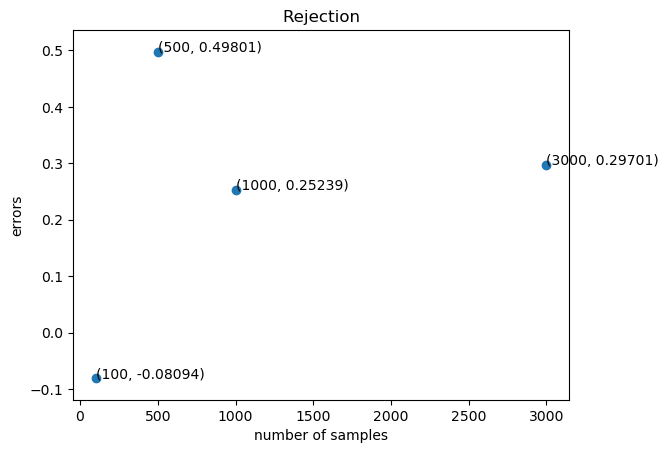

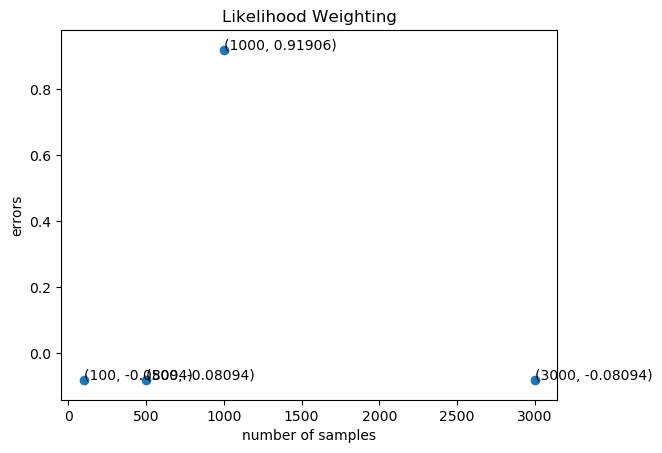

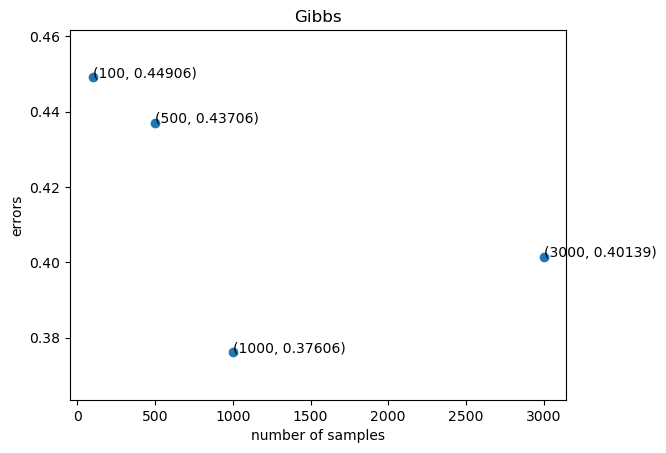

In [7]:
random.seed(5)
query = {'F': 0, 'E':1}
evidence = {'A': 1, 'D': 0}
comparing_results(query, evidence)

For Gibbs sampling, try diffrent burnin values and report the accuracy (or error).

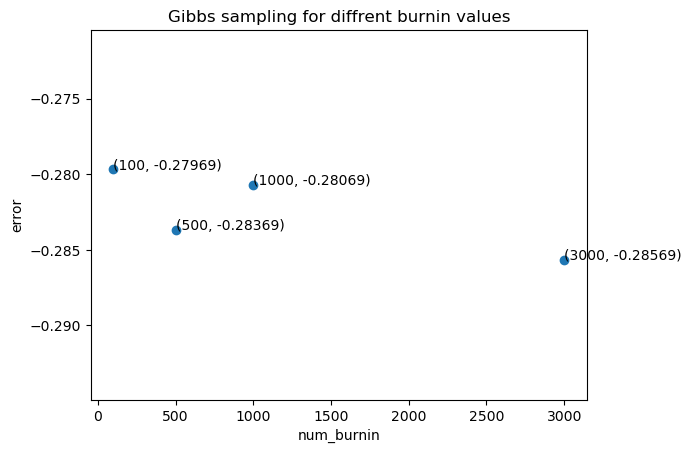

In [9]:
random.seed(5)
query = {'C': 0, 'B': 1}
evidence = {'F': 1, 'D': 0}
prob = bayes_net.pmf(query, evidence)
burnin_values = [100, 500, 1000, 3000]
error_sampling = [round(bayes_net.sampling(query, evidence, 'Gibbs', 1000, num_burnin)-prob, 5) for num_burnin in burnin_values]
plot('Gibbs sampling for diffrent burnin values', burnin_values, error_sampling, 'num_burnin','error')